# Reto Titanic
### Materia: TC3006C

In [443]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [444]:
# Open test.csv and count the number of rows
df_test = pd.read_csv('./data/test.csv')
print(df_test.shape[0])
# Open train.csv and count the number of rows
df_train = pd.read_csv('./data/train.csv')
print(df_train.shape[0])

418
891


In [445]:
# Print amount of survived and not survived passengers
# Print the amount of passengers that survived and not survived
survival_counts = df_train.groupby('Survived').size()
print(f'Passengers that survived: {survival_counts[1]} and the ones that did not: {survival_counts[0]}')
print('*'*40)

# Filter the dataset to include only men
men = df_train[df_train['Sex'] == 'male']
# Group by 'Survived' and count the number of men who survived and not survived
men_survival_counts = men.groupby('Survived').size()
print(f'Males that survived: {men_survival_counts[1]} and the ones that did not: {men_survival_counts[0]}')
print('*'*40)
female = df_train[df_train['Sex'] == 'female']
female_survival_counts = female.groupby('Survived').size()
print(f'females that survived: {female_survival_counts[1]} and the ones that did not: {female_survival_counts[0]}')

Passengers that survived: 342 and the ones that did not: 549
****************************************
Males that survived: 109 and the ones that did not: 468
****************************************
females that survived: 233 and the ones that did not: 81


---
## Análisis Exploratorio de Datos

In [446]:
# Get missing percentage per column in df_train
missing_values = df_train.isnull().mean() * 100
print(missing_values)

print('*'*50)

# Get missing percentage per column in df_test
missing_values_test = df_test.isnull().mean() * 100
print(missing_values_test)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
**************************************************
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


---

## Imputación de edades faltantes a través del promedio del título

In [447]:
# Obtain the Title from the Name column
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Obtain the average age per title
average_age_per_title = df_train.groupby('Title')['Age'].mean()

# Fill missing values in the Age column with the average age per title with a random number between a standard deviation of 1
for title in average_age_per_title.index:
    df_train.loc[(df_train['Age'].isnull()) & (df_train['Title'] == title), 'Age'] = average_age_per_title[title] + df_train['Age'].std()

# Round the age to the nearest integer
df_train['Age'] = df_train['Age'].round()

# Repeat the same process for the test dataset
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
average_age_per_title_test = df_test.groupby('Title')['Age'].mean()
for title in average_age_per_title_test.index:
    df_test.loc[(df_test['Age'].isnull()) & (df_test['Title'] == title), 'Age'] = average_age_per_title_test[title] + df_test['Age'].std()
df_test['Age'] = df_test['Age'].round()

# Repeat the same process for the test dataset using the train average age per title
for title in average_age_per_title.index:
    df_test.loc[(df_test['Age'].isnull()) & (df_test['Title'] == title), 'Age'] = average_age_per_title[title] + df_test['Age'].std()
df_test['Age'] = df_test['Age'].round()

# Drop cabin column
df_train = df_train.drop(columns=['Cabin'])
df_test = df_test.drop(columns=['Cabin'])

# Drop embarked rows with missing values in df_train
df_train = df_train.dropna(subset=['Embarked'])

# Drop rows with missing values in Fare column in df_test
df_test = df_test.dropna(subset=['Fare'])

# Drop Title columns in both datasets
df_train = df_train.drop(columns=['Title'])
df_test = df_test.drop(columns=['Title'])

# Drop 'PassengerId' in df_train
df_train = df_train.drop(columns=['PassengerId'])

# Get missing percentage per column in df_train
missing_values = df_train.isnull().mean() * 100
print(missing_values)

print('*'*50)

# Get missing percentage per column in df_test
missing_values_test = df_test.isnull().mean() * 100
print(missing_values_test)

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64
**************************************************
PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


In [448]:
# Give me the amount of columns in df_train and df_test
print(df_train.shape[1])
print(df_test.shape[1])

10
10


---

# Ticket information feature engineering

In [449]:
df_train['Ticket'] = df_train['Ticket'].replace('LINE', 'LINE 0')
df_test['Ticket'] = df_test['Ticket'].replace('LINE', 'LINE 0')

# Parse Ticket feature
df_train['Ticket'] = df_train['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
def get_prefix(ticket):
    lead = ticket.split(' ')[0][0]
    if lead.isalpha():
        return ticket.split(' ')[0]
    else:
        return 'NoPrefix'
    
df_train['TicketPrefix'] = df_train['Ticket'].apply(lambda x: get_prefix(x))

# Separate all ticket components
df_train['Ticket_Number'] = df_train['Ticket'].apply(lambda x: int(x.split(' ')[-1])//1)
df_train['Ticket_Length'] = df_train['Ticket_Number'].apply(lambda x : len(str(x)))
df_train['Ticket_FirstDigit'] = df_train['Ticket_Number'].apply(lambda x : int(str(x)[0]))
df_train['Ticket_Group'] = df_train['Ticket'].apply(lambda x: str(int(x.split(' ')[-1])//10))

# Apply al separations for test data
df_test['Ticket'] = df_test['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
df_test['TicketPrefix'] = df_test['Ticket'].apply(lambda x: get_prefix(x))
df_test['Ticket_Number'] = df_test['Ticket'].apply(lambda x: int(x.split(' ')[-1])//1)
df_test['Ticket_Length'] = df_test['Ticket_Number'].apply(lambda x : len(str(x)))
df_test['Ticket_FirstDigit'] = df_test['Ticket_Number'].apply(lambda x : int(str(x)[0]))
df_test['Ticket_Group'] = df_test['Ticket'].apply(lambda x: str(int(x.split(' ')[-1])//10))

# Drop Ticket, Ticket_Number, Ticket_Length
df_train = df_train.drop(columns=['Ticket', 'Ticket_Number', 'Ticket_Length'])
df_test = df_test.drop(columns=['Ticket', 'Ticket_Number', 'Ticket_Length'])

In [450]:
pd.crosstab(df_train['Pclass'],df_train['Ticket_FirstDigit'],margins=True)

Ticket_FirstDigit,0,1,2,3,4,5,6,7,8,9,All
Pclass,,,,,,,,,,,
1,0,190,4,14,0,4,2,0,0,0,214
2,0,22,136,23,0,1,0,2,0,0,184
3,4,17,90,330,15,4,12,13,3,3,491
All,4,229,230,367,15,9,14,15,3,3,889


In [451]:
# Print the unique 'Prefix' in df_train
print(df_train['TicketPrefix'].unique())

['a5' 'pc' 'stono2' 'NoPrefix' 'pp' 'ca' 'scparis' 'sca4' 'a4' 'sp' 'soc'
 'wc' 'sotonoq' 'wep' 'stono' 'c' 'sop' 'fa' 'line' 'fcc' 'swpp' 'scow'
 'ppp' 'sc' 'scah' 'as' 'sopp' 'fc' 'sotono2' 'casoton']


In [452]:
# Count the frequency of each 'Prefix' in df_train
print(df_train['TicketPrefix'].value_counts())

NoPrefix    659
pc           60
ca           41
a5           21
sotonoq      15
stono        12
scparis      11
wc           10
a4            7
stono2        6
soc           6
fcc           5
c             5
line          4
wep           3
scah          3
sopp          3
pp            3
sotono2       2
swpp          2
ppp           2
fc            1
as            1
scow          1
sc            1
sp            1
fa            1
sop           1
sca4          1
casoton       1
Name: TicketPrefix, dtype: int64


---
# Exploración de la columna de 'Sex' y su relación con la supervivencia

In [453]:
# Generate a df of the df['Sex'] == 'male' and df['Survived'] == 1 
male_survived = df_train[df_train['Sex'] == 'male']
female_survived = df_train[df_train['Sex'] == 'female']

---

# Grupos SOLO, SMALL, MEDIUM, LARGE

In [454]:
# Family_Count_Tr  = df_train['SibSp'] + df_train['Parch'] + 1
# Family_Count_Ts  = df_test['SibSp'] + df_train['Parch'] + 1

# def categorize_family_size(family_count):
#     if family_count == 1:
#         return 'ALONE'
#     elif family_count in [2, 3, 4]:
#         return 'SMALL'
#     elif family_count in [5, 6]:
#         return 'MEDIUM'
#     elif family_count in [7, 8, 11]:
#         return 'LARGE'
#     else:
#         return 'UNKNOWN'  # In case there are other sizes not covered

# # Apply the function to create a new column
# Family_Size_Tr= Family_Count_Tr .apply(categorize_family_size)
# Family_Size_Ts= Family_Count_Ts.apply(categorize_family_size)

# # Display the DataFrame with the new column
# #print(Family_Size_Tr)

# # Make a piovvottable grouped by the family size to analiz

# df_test['Group_Size'] = Family_Size_Ts
# df_train['Group_Size'] = Family_Size_Tr

# df_test.head()

# df_test['Group_Size',].hist()
# plt.show()


# # Create a figure and axis
# plt.figure(figsize=(10, 6))

# # Plot a histogram for the 'Survived' column grouped by 'Group_Size'
# sns.histplot(data=df_train, x='Group_Size', hue='Survived', multiple='dodge', shrink=0.8)

# # Set the title and labels
# plt.title('Survival Distribution by Family Group Size')
# plt.xlabel('Family Group Size')
# plt.ylabel('Count')

# # Show the plot
# plt.show()

---

## Segment by age of passengers and using pivot tables to analyze the survival rate

In [455]:
# Segment by age in intervals of 5 of passengers and using pivot tables to analyze the survival rate
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
age_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels)
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=age_bins, labels=age_labels)


In [456]:
# Paso 1: Contar las ocurrencias conjuntas de Group Age y Sex
joint_counts = df_train.groupby(['Sex', 'AgeGroup']).size().unstack(fill_value=0)

# Paso 2: Calcular la probabilidad condicional P(Group Age | Sex)
conditional_probabilities = joint_counts.div(joint_counts.sum(axis=1), axis=0)
print(conditional_probabilities*100)

AgeGroup       0-4       5-9     10-14      15-19      20-24      25-29  \
Sex                                                                       
female    6.730769  3.205128  3.846154  10.897436  14.423077  11.858974   
male      3.819444  1.736111  1.215278  11.631944  13.194444  12.673611   

AgeGroup     30-34      35-39     40-44      45-49     50-54     55-59  \
Sex                                                                      
female    9.294872  19.230769  5.769231   9.615385  2.564103  1.923077   
male      9.895833   7.638889  4.687500  25.173611  2.777778  2.256944   

AgeGroup     60-64     65-69     70-74     75-79  80+  
Sex                                                    
female    0.641026  0.000000  0.000000  0.000000  0.0  
male      1.909722  0.694444  0.520833  0.173611  0.0  


In [457]:
# Generar una columna donde sea el ['AgeGroup'] y el ['Sex'] en una sola columna
df_train['AgeGroup_Sex'] = df_train['AgeGroup'].astype(str) + '_' + df_train['Sex']
df_test['AgeGroup_Sex'] = df_test['AgeGroup'].astype(str) + '_' + df_test['Sex']


In [458]:
# Paso 1: Contar las ocurrencias conjuntas de Sex, Group Age y Survived
joint_counts_survived = df_train.groupby(['Sex', 'AgeGroup', 'Survived']).size().unstack(fill_value=0)

# Paso 2: Calcular la probabilidad condicional P(Survived = 1 | Sex, Group Age)
survived_counts = joint_counts_survived[1]
conditional_probabilities_survived = survived_counts.div(joint_counts_survived.sum(axis=1))
print(conditional_probabilities_survived*100)

Sex     AgeGroup
female  0-4          76.190476
        5-9          30.000000
        10-14        75.000000
        15-19        73.529412
        20-24        75.555556
        25-29        72.972973
        30-34        89.655172
        35-39        68.333333
        40-44        61.111111
        45-49        80.000000
        50-54       100.000000
        55-59        83.333333
        60-64       100.000000
        65-69              NaN
        70-74              NaN
        75-79              NaN
        80+                NaN
male    0-4          63.636364
        5-9          40.000000
        10-14        28.571429
        15-19        14.925373
        20-24        10.526316
        25-29        20.547945
        30-34        26.315789
        35-39        18.181818
        40-44        22.222222
        45-49        13.793103
        50-54        12.500000
        55-59        15.384615
        60-64         9.090909
        65-69         0.000000
        70-74         

In [459]:
# Print df_train columns
print(df_train.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'TicketPrefix', 'Ticket_FirstDigit', 'Ticket_Group',
       'AgeGroup', 'AgeGroup_Sex'],
      dtype='object')


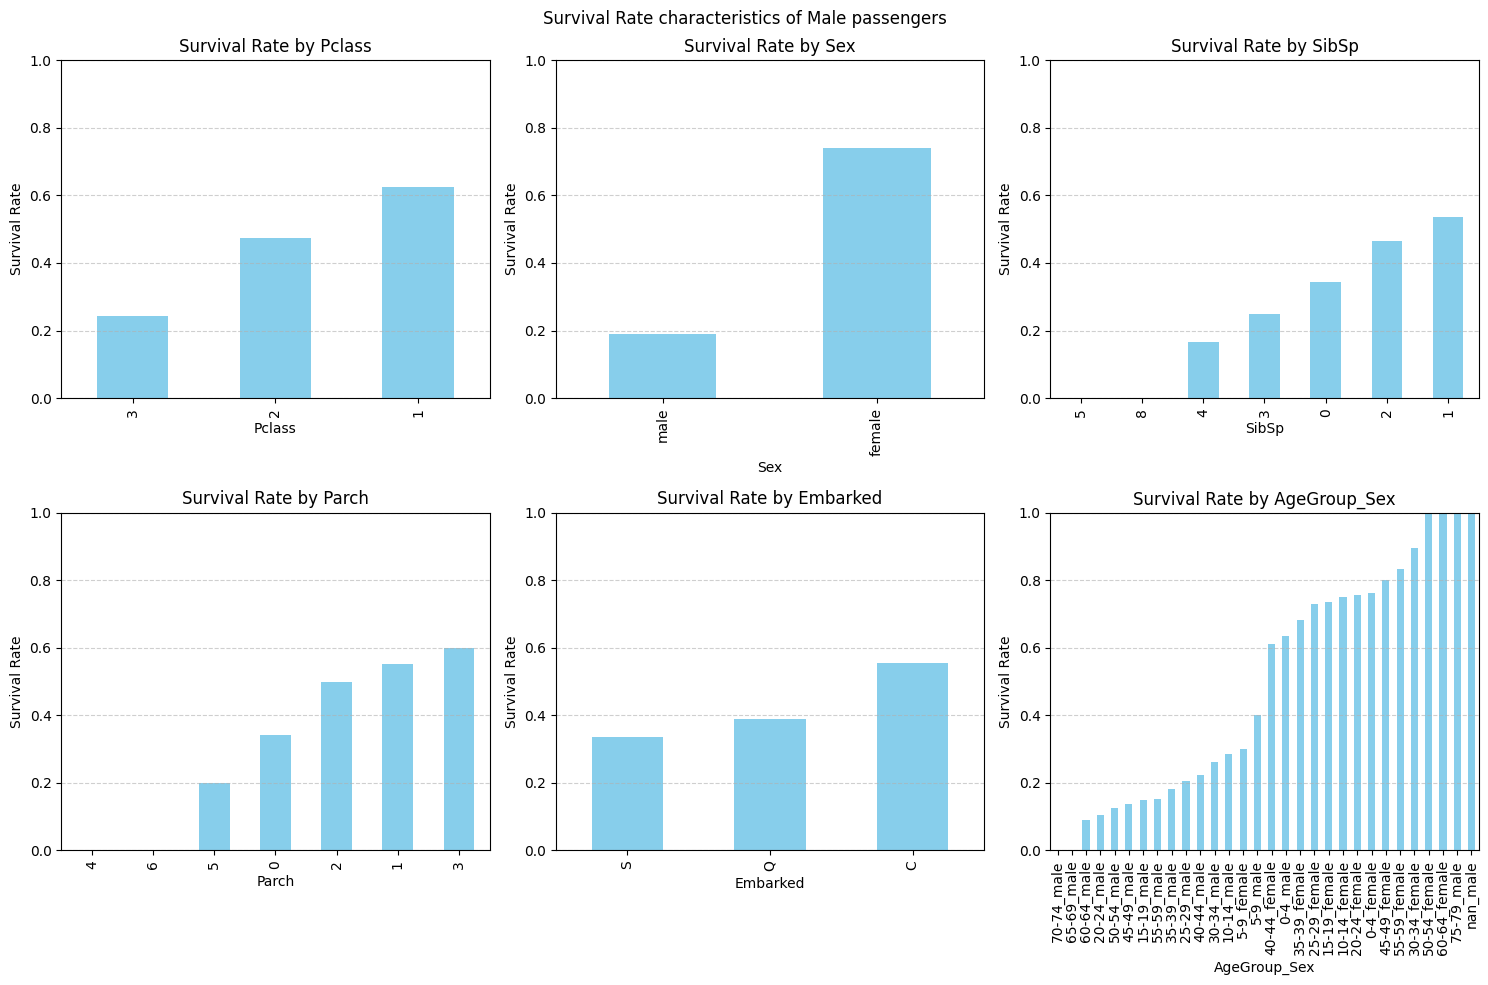

In [469]:
# Make a subplot of every column in df_train as index for the pivot table ordered by the survival rate
df_train_analisis = df_train.drop(columns=['Name', 'Age', 'Survived', 'Fare', 'TicketPrefix', 'Ticket_FirstDigit', 'Ticket_Group', 'AgeGroup'])
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Survival Rate characteristics of Male passengers')

for i, col in enumerate(df_train_analisis.columns):
    # Create pivot table with counts for each survival status
    pivot = df_train.pivot_table(index=col, columns='Survived', aggfunc='size', fill_value=0)
    # Calculate the survival rate
    pivot['Survival Rate'] = pivot[1] / (pivot[0] + pivot[1])
    # Order the pivot table by the Survival Rate in ascending order
    pivot = pivot.sort_values(by='Survival Rate', ascending=True)
    # Plot the Survival Rate
    pivot['Survival Rate'].plot(kind='bar', ax=axs[i//3, i%3], color='skyblue')
    axs[i//3, i%3].set_title(f'Survival Rate by {col}')
    axs[i//3, i%3].set_ylabel('Survival Rate')
    axs[i//3, i%3].set_ylim(0, 1)
    axs[i//3, i%3].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()